<a href="https://colab.research.google.com/github/metetolga/DeepLearningBasics/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255, X_test / 255

In [ ]:
# Convolution expects Height x Width x Channel
# Hence expand dims
preshape = X_train.shape
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(f"before expansion: {preshape}, after expansion {X_train.shape}")

before expansion: (60000, 28, 28), after expansion (60000, 28, 28, 1)


In [ ]:
# Find Final unit size of layer, # unique classes
K = len(np.unique(y_train))
print(f"# unique classes: {K}")

# unique classes: 10


In [ ]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation="relu")(i)
x = Conv2D(64, (3,3), strides=2, activation="relu")(x)
x = Conv2D(128, (3,3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)
model = Model(i, x)

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["Accuracy"]
)

In [ ]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5128 - Accuracy: 0.8090 - val_loss: 0.4059 - val_Accuracy: 0.8486
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3578 - Accuracy: 0.8653 - val_loss: 0.3389 - val_Accuracy: 0.8761
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3094 - Accuracy: 0.8832 - val_loss: 0.3183 - val_Accuracy: 0.8818
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2733 - Accuracy: 0.8962 - val_loss: 0.3094 - val_Accuracy: 0.8871
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2492 - Accuracy: 0.9053 - val_loss: 0.3004 - val_Accuracy: 0.8946
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2268 - Accuracy: 0.9140 - val_loss: 0.2971 - val_Accuracy: 0.8969
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2107 - Accuracy: 0.9190 - val_loss: 0.2956 - val_Accuracy:

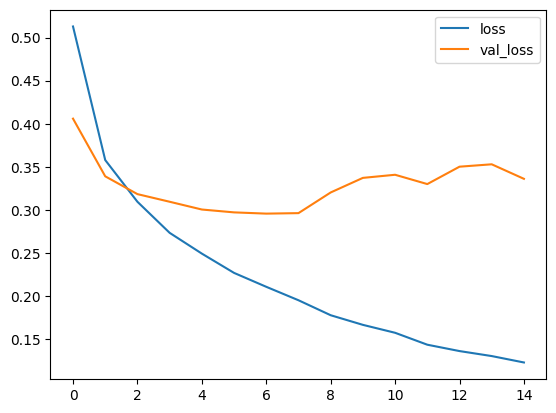

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

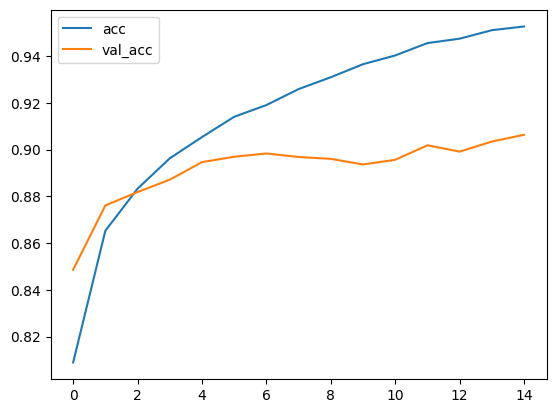

In [ ]:
plt.plot(r.history['Accuracy'], label='acc')
plt.plot(r.history['val_Accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.3360 - Accuracy: 0.9063
[0.33602282404899597, 0.9063000082969666]


313/313 [==============================] - 1s 2ms/step
confusion matrix without normalization


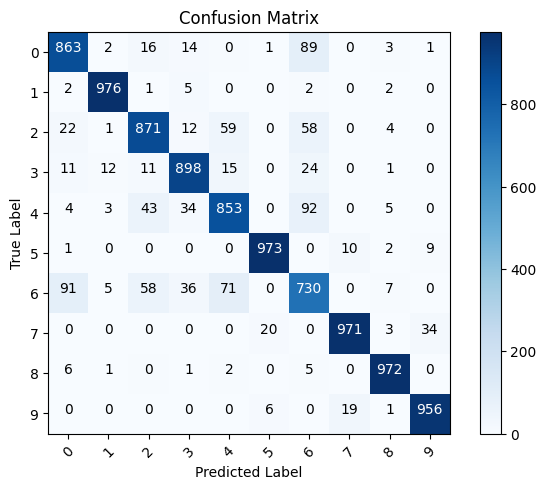

In [ ]:
def plot_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("confusion matrix with normalization")
  else:
    print("confusion matrix without normalization")

  # If wanted to see, raw representation of confusion matrix
  # print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j, i,
        format(cm[j, i],fmt),
        horizontalalignment = 'center',
        color = 'white' if cm[j, i] > thresh else 'black'
    )
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_cm(cm, list(range(10)))

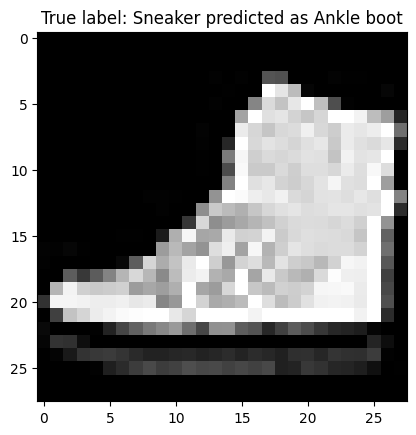

In [ ]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
          'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_missclassified(pred, true):
  misscls_idx = np.where(pred != true)[0]
  i = np.random.choice(misscls_idx)
  plt.imshow(X_test[i], cmap='gray')
  plt.title('True label: %s predicted as %s' % (labels[y_test[i]], labels[p_test[i]]))
  plt.show()

plot_missclassified(p_test, y_test)